<a href="https://colab.research.google.com/github/sanggusti/fisher-eater/blob/main/fisher_eater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fisher Eater

### Unzip data

In [ ]:
!unzip "FAB15.zip"

Archive:  FAB15.zip
  inflating: 051.csv                 
  inflating: 101.csv                 
  inflating: 102.csv                 
  inflating: 103.csv                 
  inflating: 161.csv                 
  inflating: 162.csv                 
  inflating: 163.csv                 


### EDA

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

bin
boot
content
data
datalab
dev
etc
home
lib
lib32
lib64
media
mnt
opt
proc
python-apt
root
run
sbin
srv
sys
tensorflow-1.15.2
tmp
tools
usr
var



In [ ]:
data_1 = pd.read_csv("051.csv")
data_1.head()

,x,y,z,label
0,3,239,34,1
1,9,247,30,1
2,8,252,31,1
3,0,255,37,1
4,-12,252,39,1


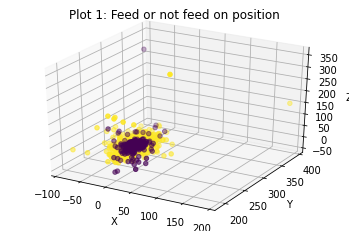

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
x = data_1["x"]
y = data_1["y"]
z = data_1["z"]
c = data_1["label"]
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('X')
_ = ax.set_ylabel('Y')
_ = ax.set_zlabel('Z')
_ = plt.title("Plot 1: Feed or not feed on position")
plt.show()

In [ ]:
# Make the plotting as a function

def feeding_plot(data, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = "3d")
    x = data["x"]
    y = data["y"]
    z = data["z"]
    c = data["label"]
    _ = ax.scatter(xs=x, ys=y, zs=z, c=c)
    _ = ax.set_xlabel('X')
    _ = ax.set_ylabel('Y')
    _ = ax.set_zlabel('Z')
    _ = plt.title(title)
    plt.show()

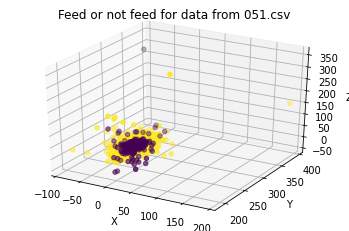

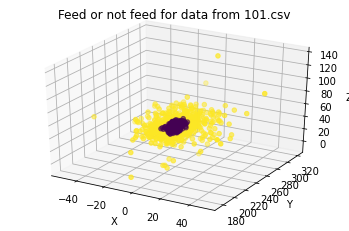

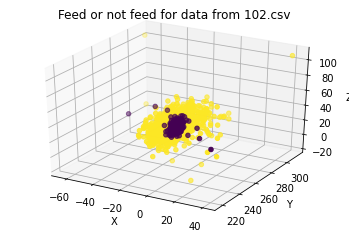

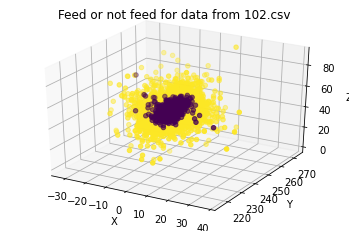

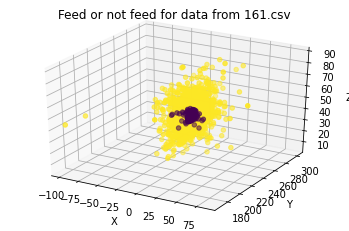

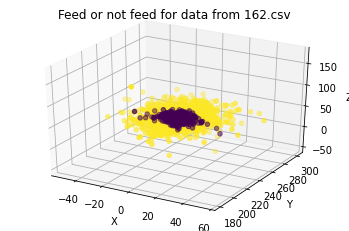

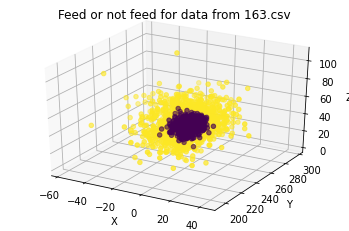

In [ ]:
data_2 = pd.read_csv("101.csv")
data_3 = pd.read_csv("102.csv")
data_4 = pd.read_csv("103.csv")
data_5 = pd.read_csv("161.csv")
data_6 = pd.read_csv("162.csv")
data_7 = pd.read_csv("163.csv")

feeding_plot(data_1, "Feed or not feed for data from 051.csv")
feeding_plot(data_2, "Feed or not feed for data from 101.csv")
feeding_plot(data_3, "Feed or not feed for data from 102.csv")
feeding_plot(data_4, "Feed or not feed for data from 102.csv")
feeding_plot(data_5, "Feed or not feed for data from 161.csv")
feeding_plot(data_6, "Feed or not feed for data from 162.csv")
feeding_plot(data_7, "Feed or not feed for data from 163.csv")

### Fancier Plot

In [ ]:
import plotly.express as px


df = data_1
fig = px.scatter_3d(
      df, 
      x="x", 
      y="y", 
      z="z", 
      color="label",
      # symbol="label", 
      opacity = 0.9,
      title = "Eat or not eat data_1"
    )
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [ ]:
import plotly.graph_objects as go


fig = go.Figure

### Feature Extraction